In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
M, N = 10, 10  # Tamaño de la cuadrícula
r, s = 3, 3  # Tamaño de la región bloqueada
T = 100  # Tiempo total de la simulación
K = 0.1  # Probabilidad de moverse
P = 500  # Número de partículas
Nexp = 10  # Número de experimentos

In [3]:
def distribute_particles(u0, P):
    particles = []
    for _ in range(P):
        i, j = np.unravel_index(np.random.choice(u0.size, p=u0.ravel()), u0.shape)
        particles.append([i, j])
    return np.array(particles)

In [4]:
def move_particles(particles, mask, K):
    for i, (x, y) in enumerate(particles):
        if mask[x, y] == 1:  # Solo mover si la celda está permitida
            if np.random.rand() < K:  # Probabilidad de moverse
                move = np.random.choice(8)  # Seleccionar un vecino
                if move == 0 and x > 0: particles[i, 0] -= 1  # Arriba
                if move == 1 and x < M-1: particles[i, 0] += 1  # Abajo
                if move == 2 and y > 0: particles[i, 1] -= 1  # Izquierda
                if move == 3 and y < N-1: particles[i, 1] += 1  # Derecha
                if move == 4 and x > 0 and y > 0: particles[i] -= [1, 1]  # Arriba-izquierda
                if move == 5 and x > 0 and y < N-1: particles[i] -= [1, -1]  # Arriba-derecha
                if move == 6 and x < M-1 and y > 0: particles[i] += [1, -1]  # Abajo-izquierda
                if move == 7 and x < M-1 and y < N-1: particles[i] += [1, 1]  # Abajo-derecha
    return particles


In [9]:
def create_mask(M, N, r, s):
    mask = np.ones((M, N))
    mask[:r, :s] = 0  
    return mask


def initialize_distribution(M, N):
    u0 = np.random.rand(M, N)  # Distribución aleatoria inicial
    return u0 / np.sum(u0)  # Normalizado

In [7]:
def simulate_particle_diffusion(M, N, r, s, T, K, P, Nexp):
    mask = create_mask(M, N, r, s)  # Crear máscara de la región
    u0 = initialize_distribution(M, N)  # Inicializar distribución
    avg_grid = np.zeros((M, N))  # Inicializar el promedio de la simulación
    history = []  # Para almacenar los estados intermedios de la simulación

    for _ in range(Nexp):
        particles = distribute_particles(u0, P)  # Distribuir partículas
        grid = np.zeros((M, N))

        for t in range(T):
            particles = move_particles(particles, mask, K)  # Mover partículas
            grid = np.zeros((M, N))  # Reiniciar la cuadrícula de partículas para el frame actual
            for x, y in particles:
                grid[x, y] += 1  # Actualizar la cuadrícula de partículas
            history.append(grid.copy())  # Guardar el estado actual en el historial
        avg_grid += grid / P  # Promediar las partículas por celda

    return history, avg_grid / Nexp  # Devolver el historial y el promedio


In [6]:
def normalize(grid):
    return grid / np.sum(grid)

In [11]:
def plot_diffusion_particle_simulation(avg_grid):
    fig, ax = plt.subplots()
    im = ax.imshow(normalize(avg_grid), cmap='viridis', interpolation='none')
    fig.colorbar(im)
    plt.title('Simulación Promedio de Partículas')
    plt.show()

In [14]:
def create_gif(history, filename='diffusion_particle_simulation.gif'):
    fig, ax = plt.subplots()
    
    def update(frame):
        ax.clear()
        ax.set_title(f'Time: {frame}')
        im = ax.imshow(history[frame], cmap='viridis', interpolation='none')
        return im,
    
    ani = animation.FuncAnimation(fig, update, frames=len(history), repeat=False)
    ani.save(filename, writer='pillow')
    plt.show()

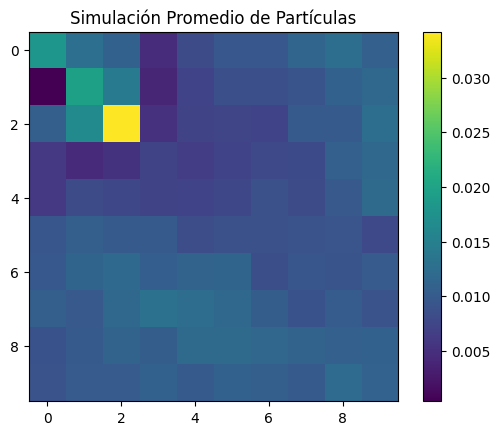

In [12]:

# Ejecutar la simulación
avg_grid = simulate_particle_diffusion(M, N, r, s, T, K, P, Nexp)

# Graficar el resultado normalizado
plot_diffusion_particle_simulation(avg_grid)

MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x000001C3444EFBA0> (for post_execute), with arguments args (),kwargs {}:


TypeError: Invalid shape (10,) for image data

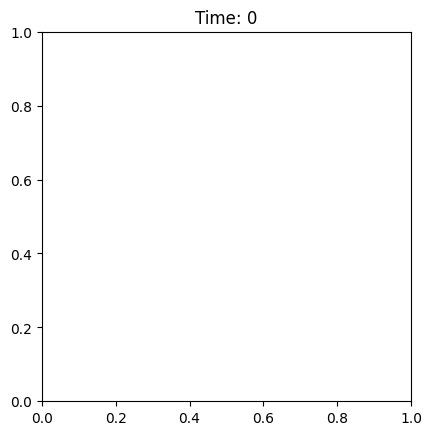

In [13]:
# Generar la animación en formato gif
create_gif(history, 'diffusion_particle_simulation.gif')
